<a href="https://www.kaggle.com/code/thonenyangal/credit-fault-detection-2024-aung-hein?scriptVersionId=190758261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Library Import Here

In [1]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=7f208cc23aef0ff399aad71397c3a6f8dfa7fb0428cc2e6a25ec17b76caed794
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score,classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%matplotlib inline

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


# Data Loading

In [3]:
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

In [4]:
df.set_index('id',inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     568630 

In [6]:
#checking null value
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#delete duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
#target value summary
df.Class.value_counts()

Class
0    284315
1    284314
Name: count, dtype: int64

# Basic EDA

In [9]:
#statistic summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,568629.0,2.997590e-06,0.999999,-3.495584,-0.565285,-0.093636,0.832658,2.229046
V2,568629.0,-4.570993e-06,0.999996,-49.966572,-0.486680,-0.135894,0.343553,4.361865
V3,568629.0,2.119819e-06,1.000000,-3.183760,-0.649298,0.000354,0.628539,14.125834
V4,568629.0,-8.855104e-07,1.000002,-4.951222,-0.656021,-0.073764,0.707006,3.201536
V5,568629.0,1.670112e-06,1.000001,-9.952786,-0.293495,0.081089,0.439738,42.716891
V6,568629.0,-5.673299e-06,0.999993,-21.111108,-0.445872,0.078716,0.497788,26.168402
V7,568629.0,4.085432e-06,0.999997,-4.351839,-0.283533,0.233367,0.525955,217.873038
V8,568629.0,1.060043e-05,0.999970,-10.756342,-0.192257,-0.114523,0.047299,5.958040
V9,568629.0,-4.807863e-07,1.000002,-3.751919,-0.568750,0.092526,0.559266,20.270062
V10,568629.0,1.229084e-06,1.000001,-3.163276,-0.590101,0.262617,0.592462,31.722709


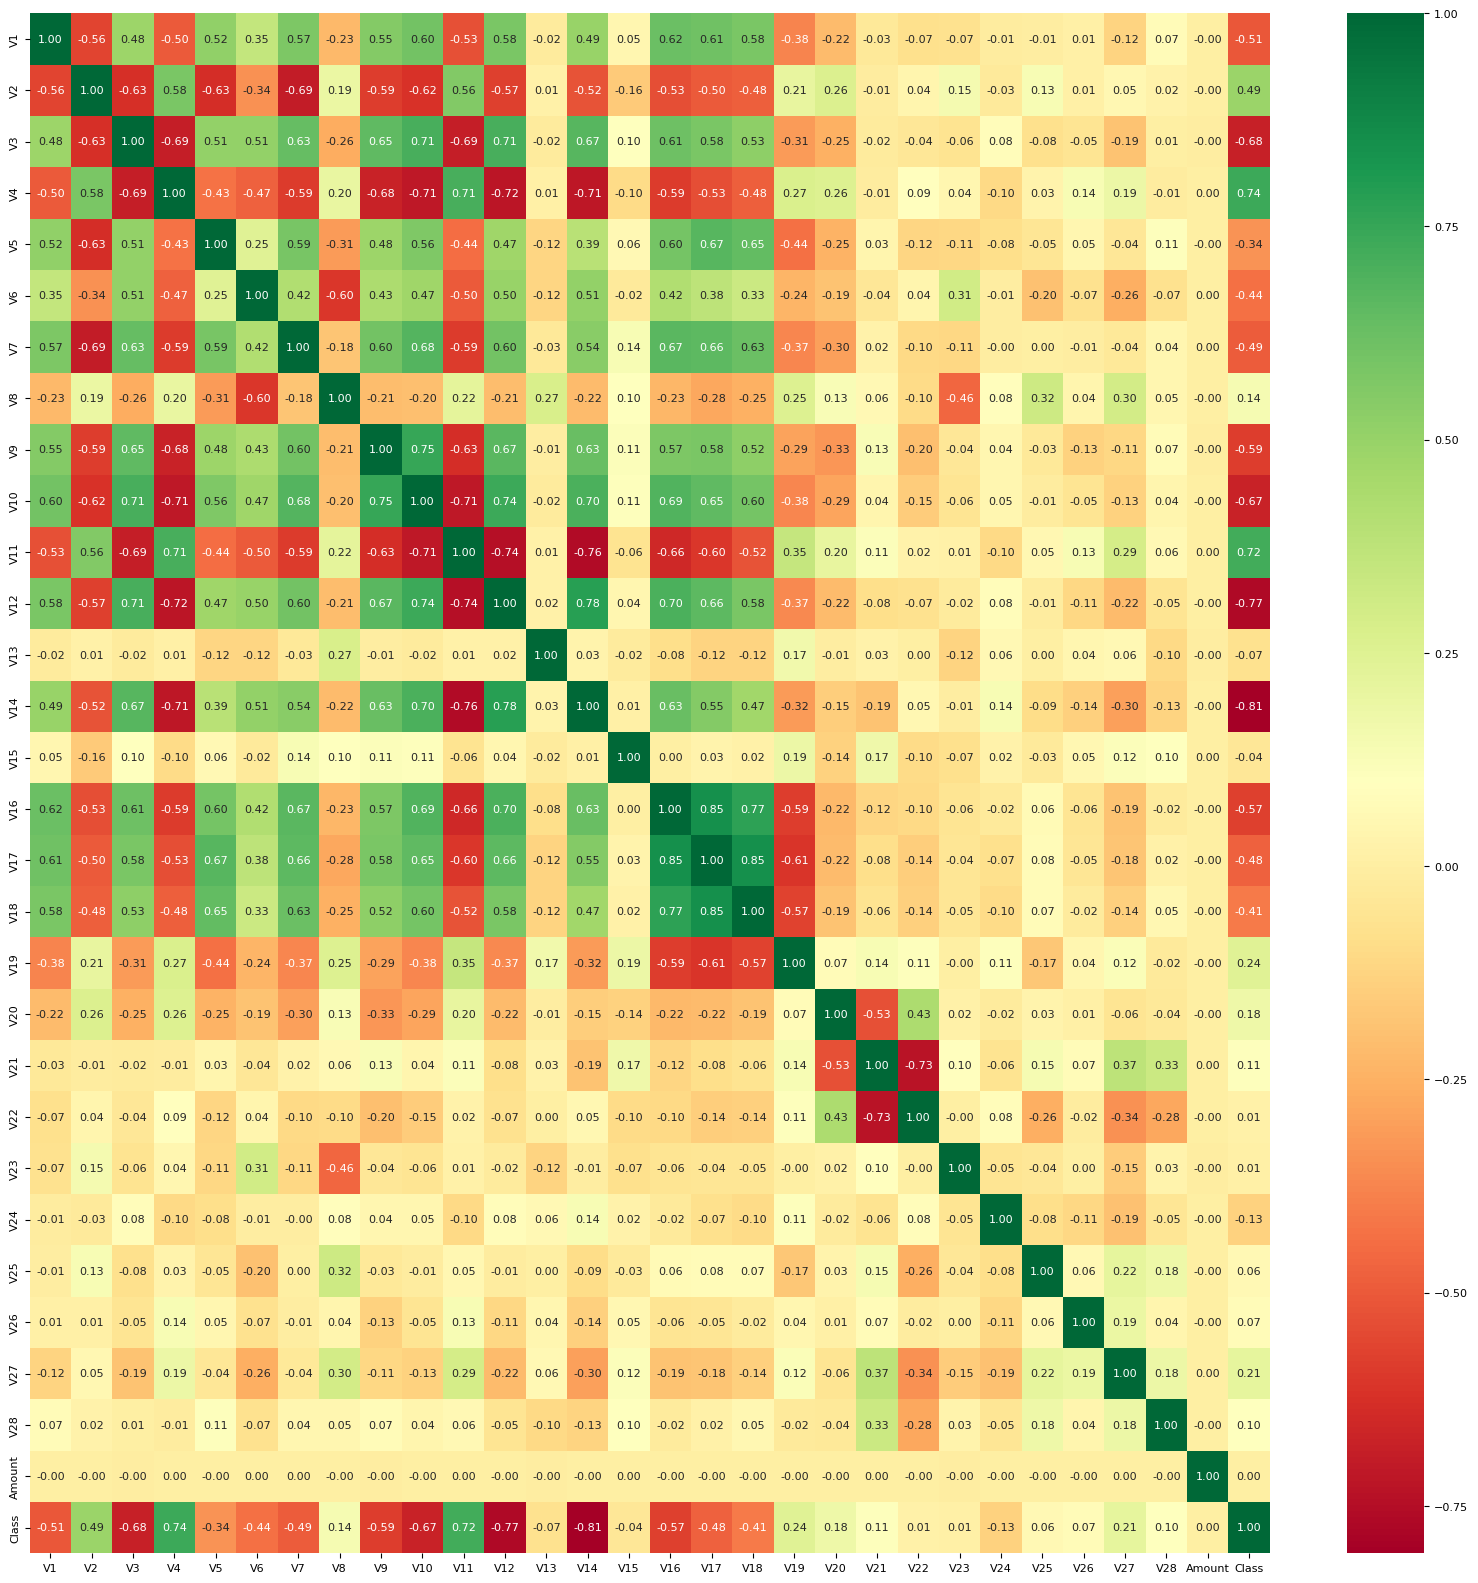

In [10]:
#correlation
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 8})
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',fmt=".2f")
plt.show()

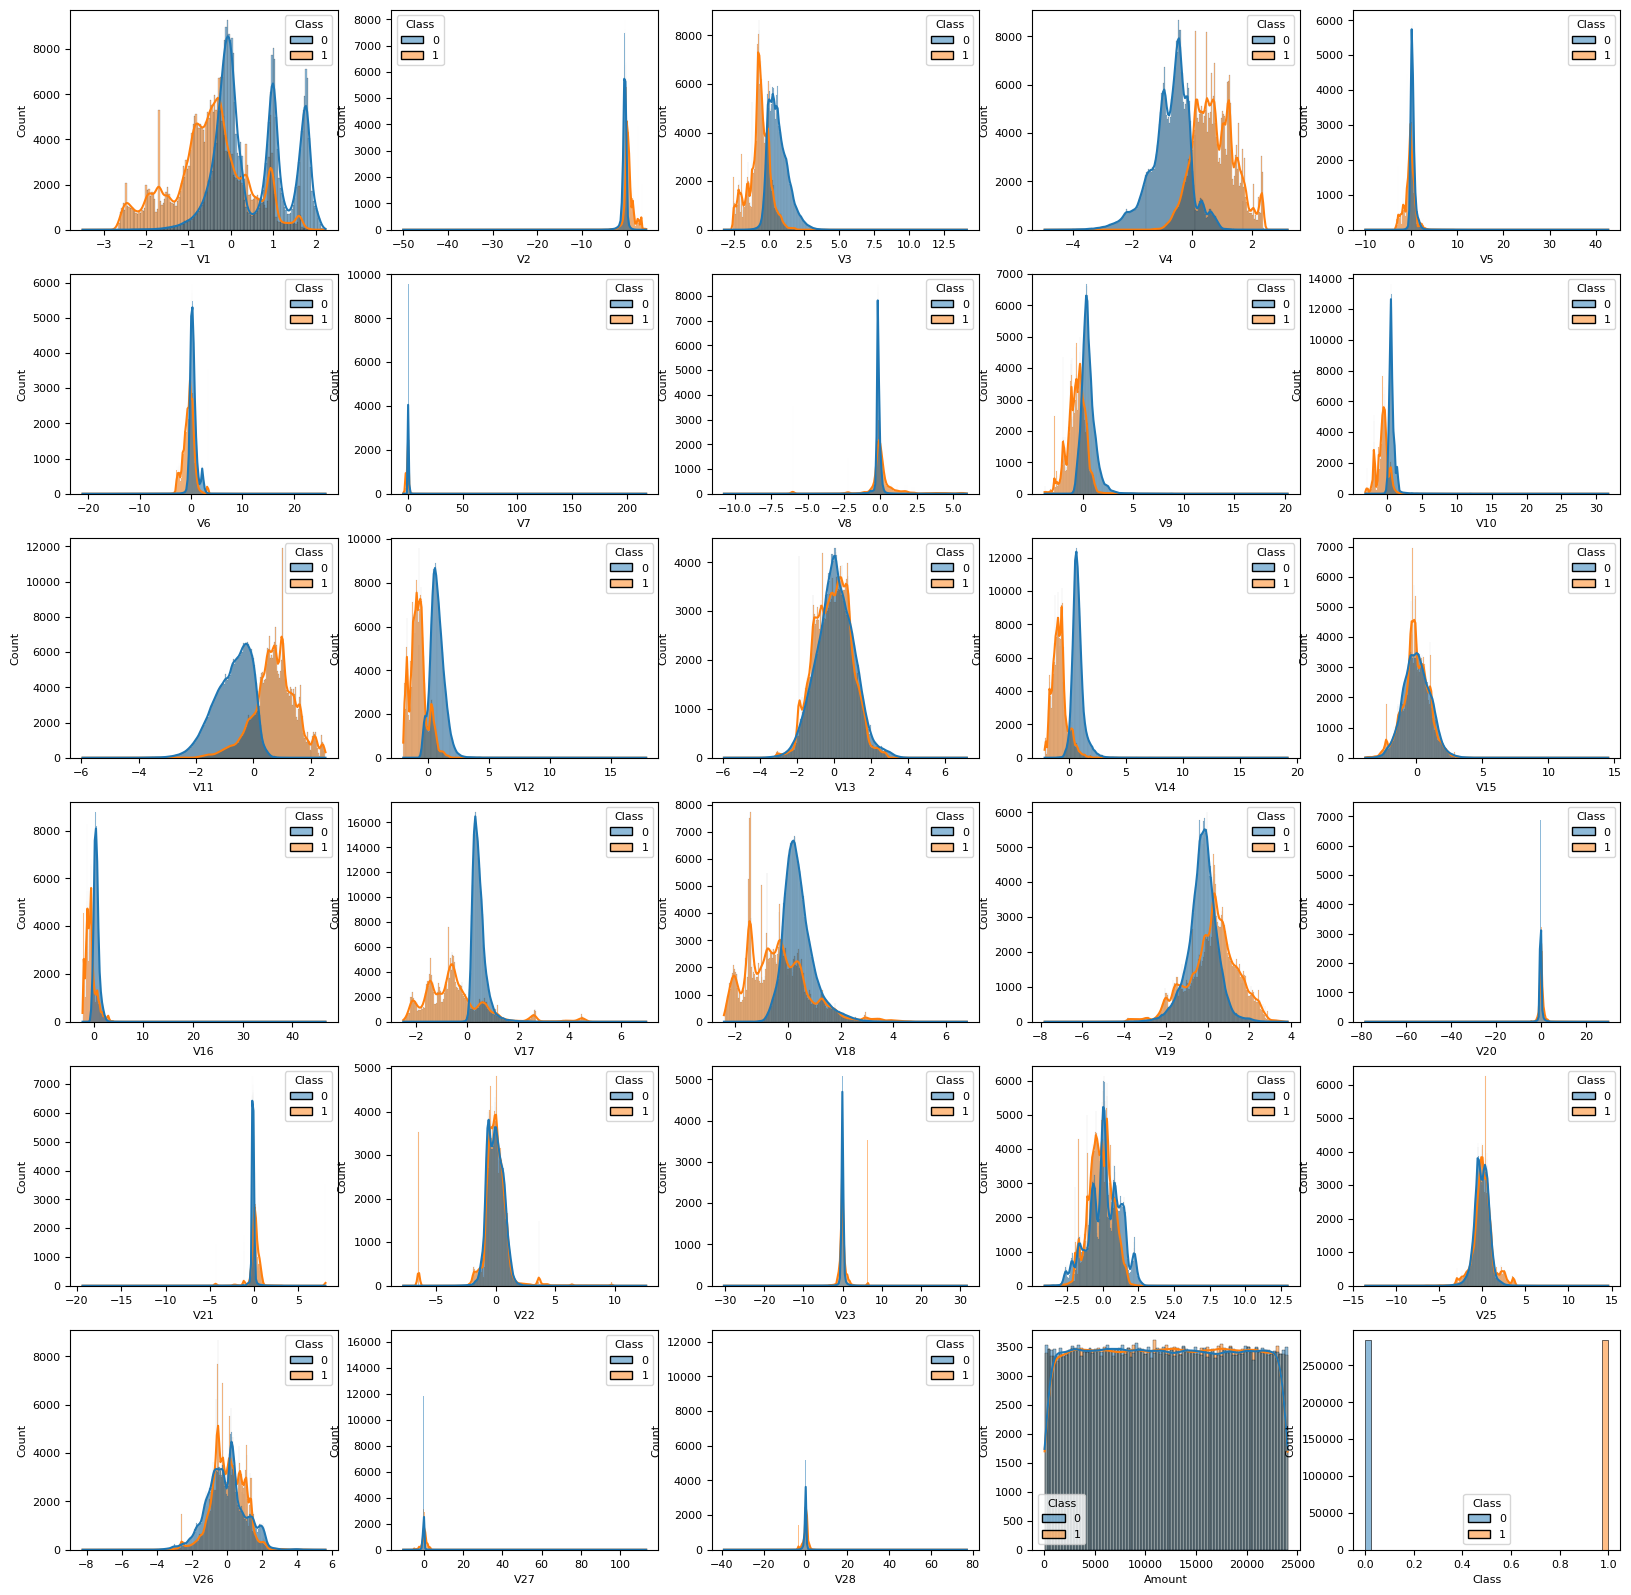

In [11]:
#distribution
fig, axList = plt.subplots(nrows=6, ncols=5)
axList = axList.flatten()
fig.set_size_inches(20,20)
x=0
for col in df.columns:
    sns.histplot(df,x=col,hue= df['Class'], kde=True,ax=axList[x])
    x+=1

<Axes: >

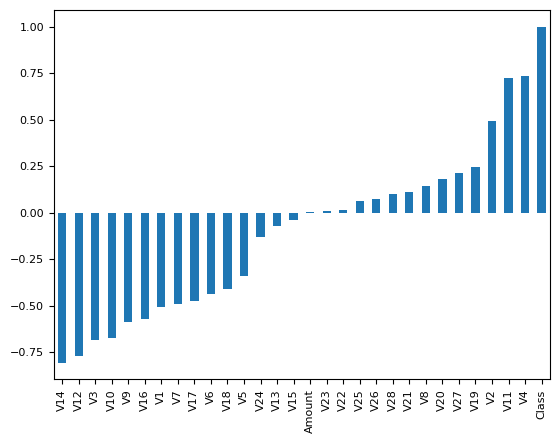

In [12]:
#correlation
df.corr()['Class'].sort_values().plot(kind='bar')

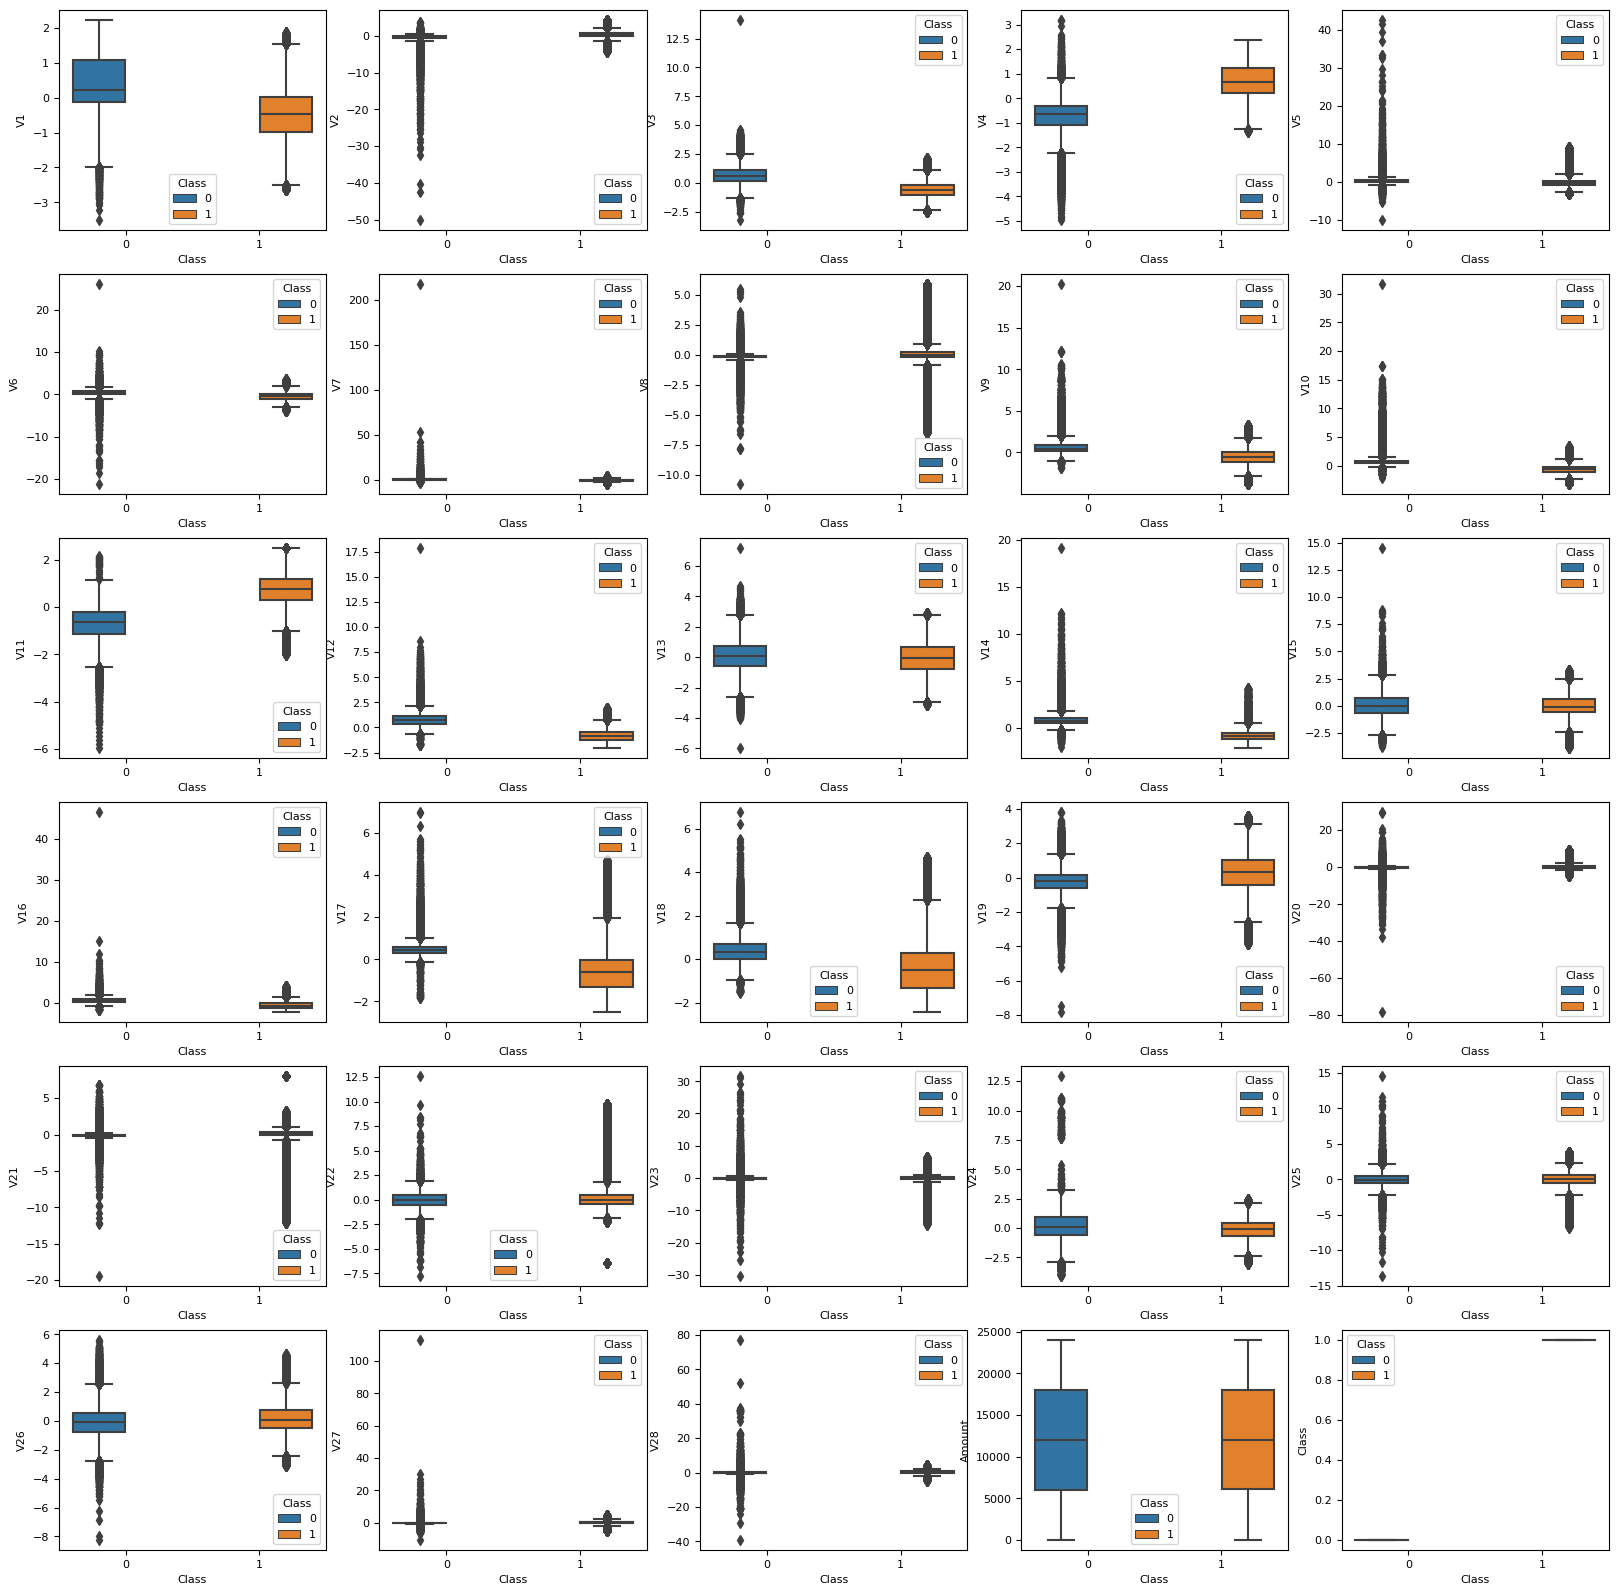

In [13]:
#Outlier
fig, axList = plt.subplots(nrows=6, ncols=5)
axList = axList.flatten()
fig.set_size_inches(20,20)
x=0
for col in df.columns:
    sns.boxplot(df,x='Class',y=col,ax=axList[x],hue='Class')
    x+=1


# Data Transformation

In [14]:
#Feature Selection

X = df.drop('Class',axis=1)
feature_cols=X.columns
X = StandardScaler().fit_transform(X)
y = df['Class']
f_selected = df.drop(['Class','V7','Amount'],axis=1).columns

In [15]:
## Train Test Split ##
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=32,shuffle=True,stratify=y)

X_train_sel,X_test_sel,y_train_sel,y_test_sel = train_test_split(df.drop('Class',axis=1)[f_selected],y,train_size=0.2,random_state=32,shuffle=True,stratify=y)

In [16]:
#Helper Function
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

# LogisticRegression

Here,Prediction will be experience with a few logisticRegression models.

## LogisticRegression with L2 Penalty

In [17]:
l2_nc = LogisticRegression(penalty='l2',solver='newton-cholesky',multi_class='ovr',max_iter=1000)
l2_nc.fit(X_train,y_train)
l2_nc_predit = l2_nc.predict(X_test)
evaluate_metrics(y_test,l2_nc_predit)

{'accuracy': 0.9650871392645481,
 'recall': array([0.97840423, 0.95177004]),
 'precision': array([0.95302128, 0.97781331]),
 'f1score': array([0.96554597, 0.96461593])}

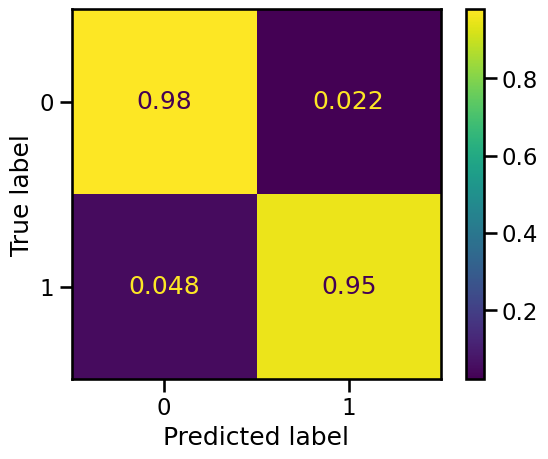

In [18]:
cf = confusion_matrix(y_test, l2_nc_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l2_nc.classes_)
disp.plot()
plt.show()

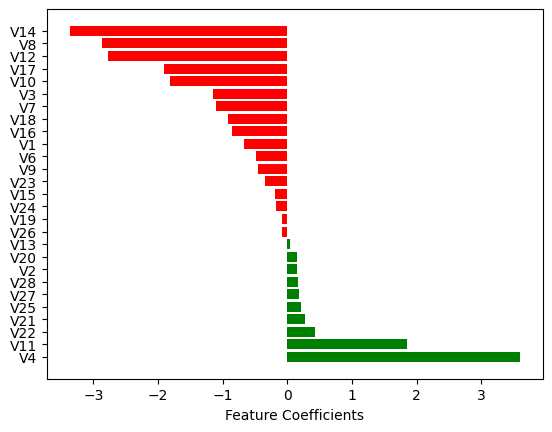

In [19]:
coef_dict = get_feature_coefs(l2_nc, 0, feature_cols)
visualize_coefs(coef_dict)

## Logistic Regression with L1 Penalty

In [20]:
l1 = LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr',l1_ratio=0.7,max_iter=1000)
l1.fit(X_train,y_train)
l1_predit = l1.predict(X_test)
evaluate_metrics(y_test,l1_predit)

{'accuracy': 0.9650101999542761,
 'recall': array([0.97861527, 0.95140513]),
 'precision': array([0.95269238, 0.97801711]),
 'f1score': array([0.96547985, 0.9645276 ])}

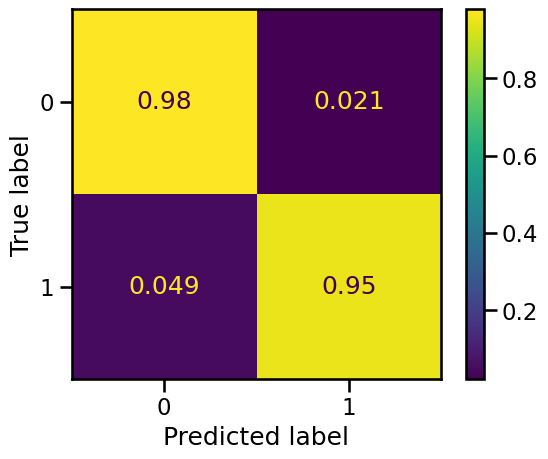

In [21]:
cf = confusion_matrix(y_test, l1_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1.classes_)
disp.plot()
plt.show()

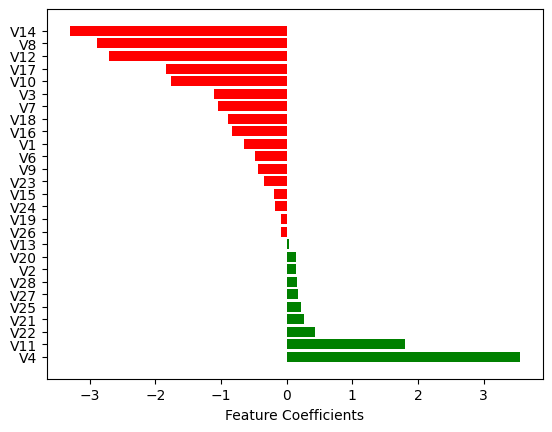

In [22]:
coef_dict = get_feature_coefs(l1, 0, feature_cols)
visualize_coefs(coef_dict)

## Logistic Regression with Elasticnet

In [23]:
els = LogisticRegression(penalty='elasticnet',solver='saga',multi_class='ovr',l1_ratio=0.51,max_iter=1000)
els.fit(X_train,y_train)
els_predit = els.predict(X_test)
evaluate_metrics(y_test,els_predit)

{'accuracy': 0.9650014068902449,
 'recall': array([0.97866363, 0.95133918]),
 'precision': array([0.95263345, 0.97806425]),
 'f1score': array([0.96547312, 0.96451663])}

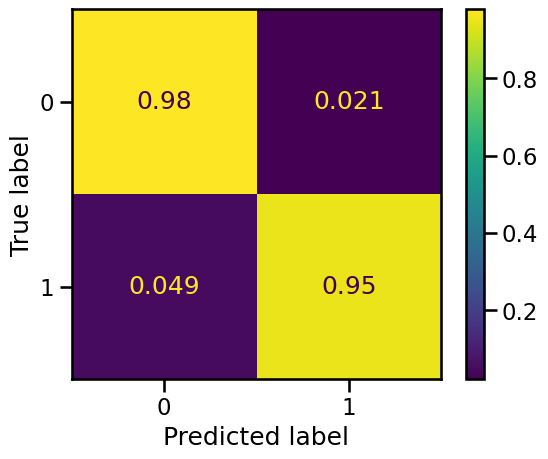

In [24]:
cf = confusion_matrix(y_test, els_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=els.classes_)
disp.plot()
plt.show()

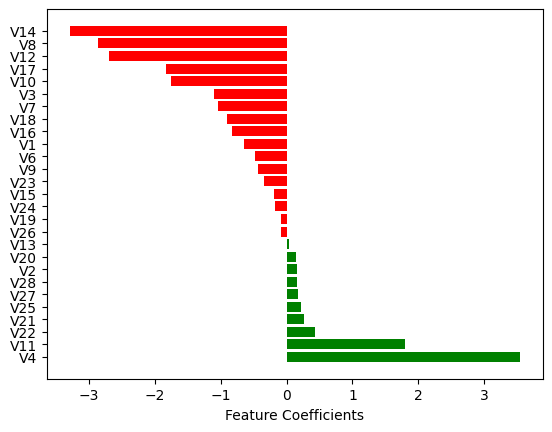

In [25]:
coef_dict = get_feature_coefs(els, 0, feature_cols)
visualize_coefs(coef_dict)

# K Neighbors Classsifier

In [26]:
#finding best K-values
max_k = 20
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_sel, y_train_sel)
    y_pred = knn.predict(X_test_sel)
    f1 = f1_score(y_pred, y_test_sel)
    f1_scores.append((k, round(f1_score(y_test_sel, y_pred), 4)))
    error = 1-round(accuracy_score(y_test_sel, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

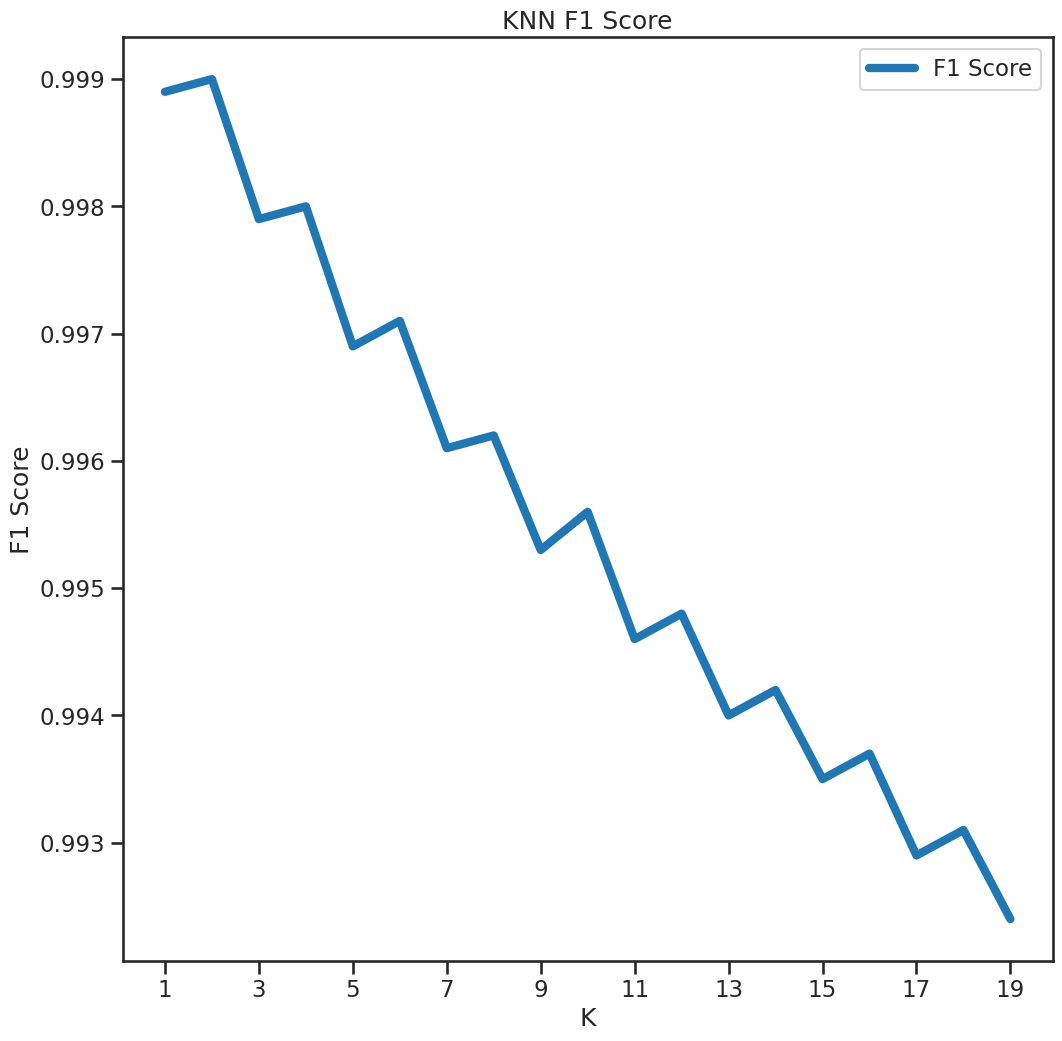

In [27]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')
plt.show()

<Figure size 1920x1440 with 0 Axes>

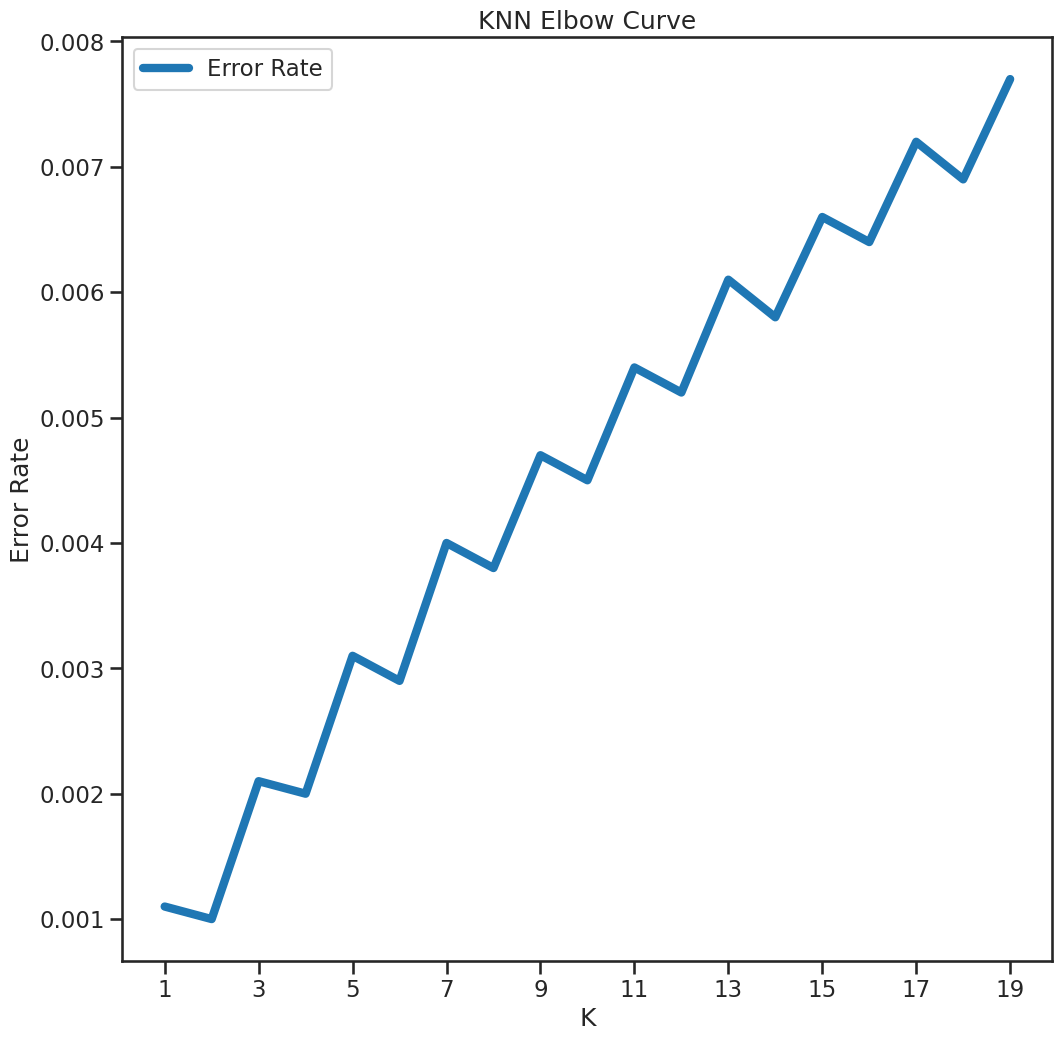

In [28]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
plt.show()

## KNN Model without features selection

In [29]:
knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)
knn_predit = knn.predict(X_test)
evaluate_metrics(y_test,knn_predit)

{'accuracy': 0.9951814009109614,
 'recall': array([0.99037159, 0.99999121]),
 'precision': array([0.99999112, 0.99046333]),
 'f1score': array([0.99515811, 0.99520447])}

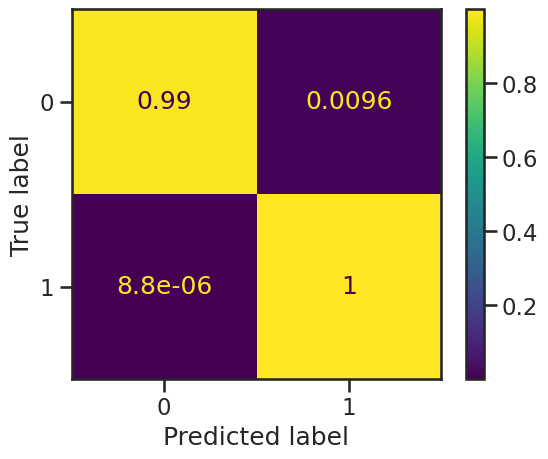

In [30]:
cf = confusion_matrix(y_test,knn_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=knn.classes_)
disp.plot()
plt.show()

## KNN Model with features selection

In [31]:
knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train_sel, y_train_sel)
knn_predit = knn.predict(X_test_sel)
evaluate_metrics(y_test_sel,knn_predit)

{'accuracy': 0.9970763062096618,
 'recall': array([0.99415261, 1.        ]),
 'precision': array([1.        , 0.99418661]),
 'f1score': array([0.99706773, 0.99708483])}

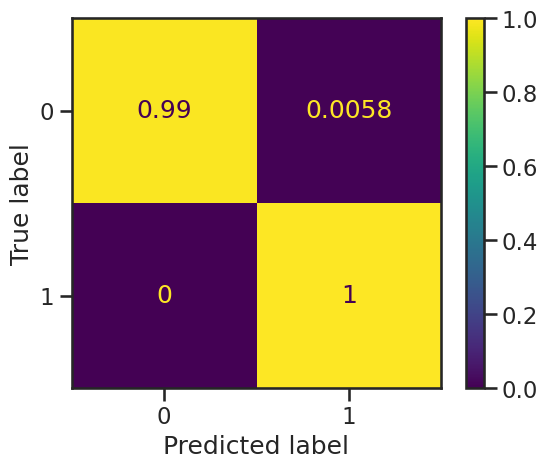

In [32]:
cf = confusion_matrix(y_test_sel,knn_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=knn.classes_)
disp.plot()
plt.show()

In [33]:
#Cross Validation
sf = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)

knn = KNeighborsClassifier(n_neighbors=6)

predictions = cross_val_predict(knn, df[f_selected], y, cv=sf)
evaluate_metrics(y,predictions)

{'accuracy': 0.9990714508053582,
 'recall': array([0.9981429, 1.       ]),
 'precision': array([1.        , 0.99814634]),
 'f1score': array([0.99907059, 0.99907231])}

# DecisionTreeClassifier

## DecisionTree Classifier without feature selection

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2)}

GR_sugar = GridSearchCV(DecisionTreeClassifier(random_state=123,max_features=6),
                     param_grid=param_grid,
                     scoring='accuracy',
                      n_jobs=-2)

GR_sugar = GR_sugar.fit(X_train, y_train)

In [35]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(1581, 19)

In [36]:
dr = DecisionTreeClassifier(random_state=123,max_features=6,max_depth=36).fit(X_train, y_train)
dr_predit = dr.predict(X_test)
evaluate_metrics(y_test,dr_predit)

{'accuracy': 0.9939086048924608,
 'recall': array([0.99262262, 0.99519459]),
 'precision': array([0.9951822 , 0.99264155]),
 'f1score': array([0.99390076, 0.99391643])}

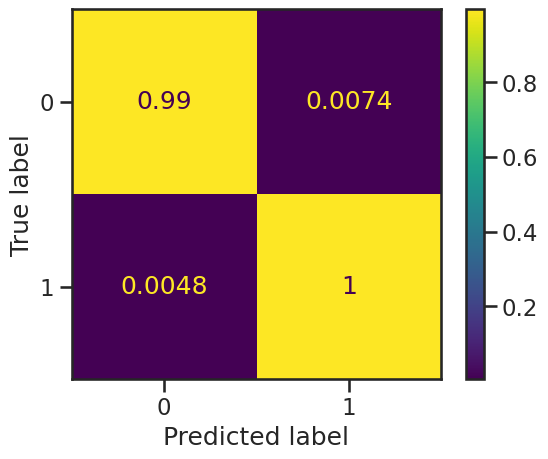

In [37]:
cf = confusion_matrix(y_test,dr_predit, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()
plt.show()

In [38]:
#Cross Validation
sf = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)
dt = DecisionTreeClassifier(random_state=123,max_features=6,max_depth=36)

predictions = cross_val_predict(dt, X, y, cv=sf)
evaluate_metrics(y,predictions)

{'accuracy': 0.9978791092258749,
 'recall': array([0.99720029, 0.99855793]),
 'precision': array([0.99855598, 0.99720407]),
 'f1score': array([0.99787767, 0.99788054])}

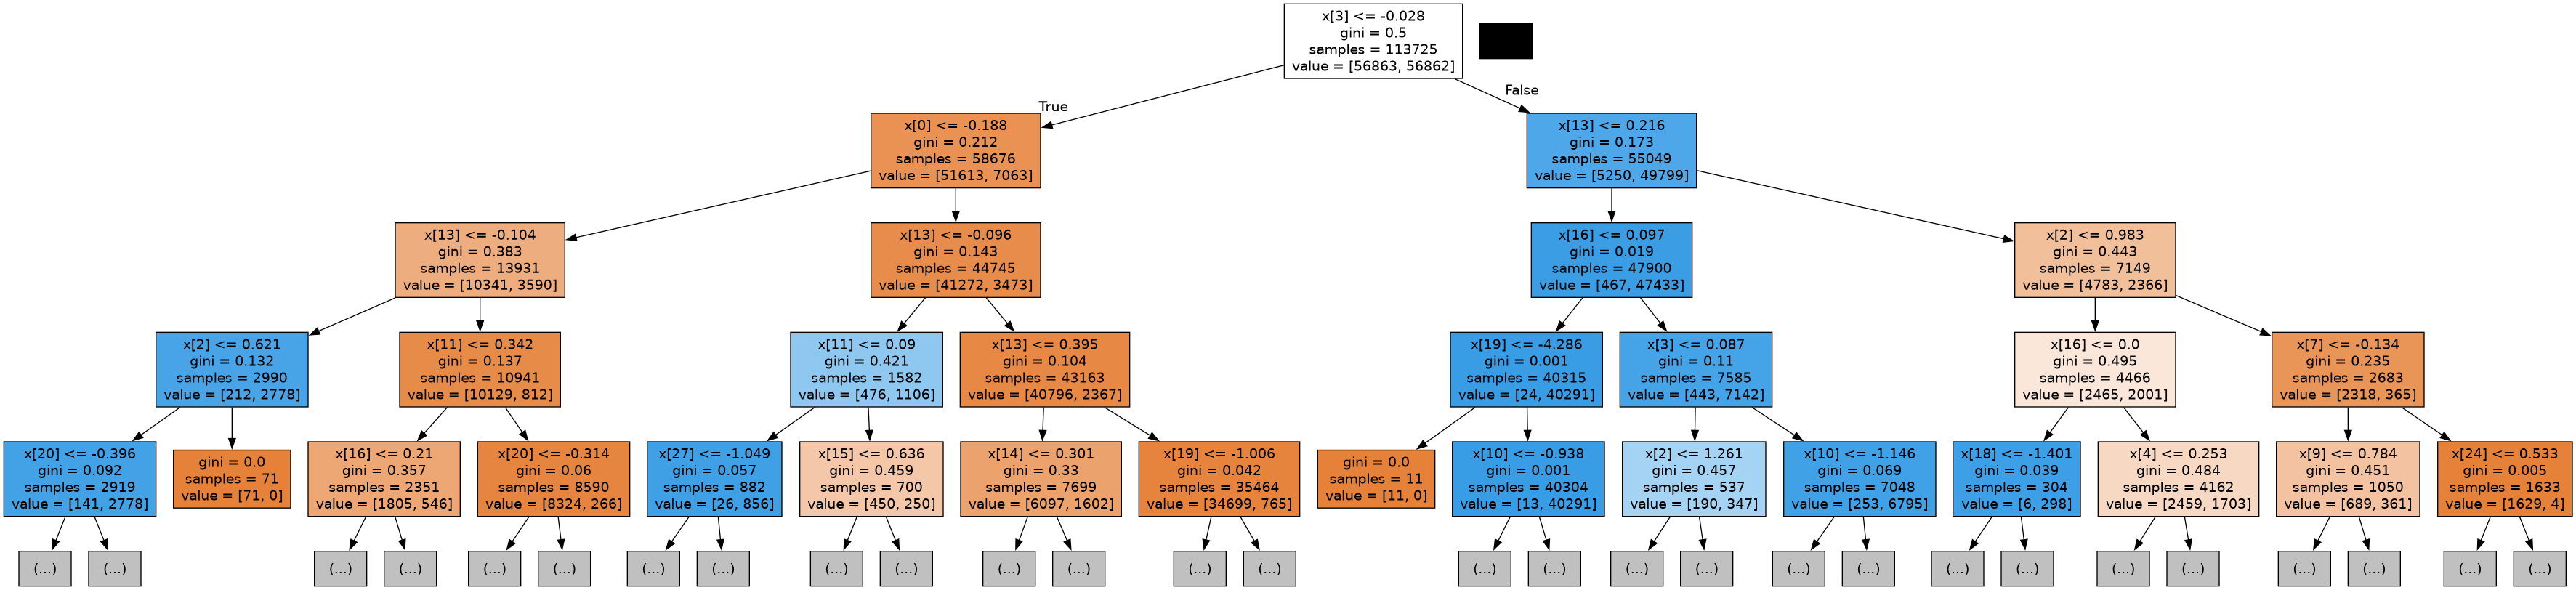

In [39]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dr, out_file=dot_data, filled=True,max_depth=4)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename) 

## DecisionTree Classifier with feature selection

In [40]:
dr = DecisionTreeClassifier(random_state=123,max_features=6,max_depth=36).fit(X_train_sel, y_train_sel)
dr_predit = dr.predict(X_test_sel)
evaluate_metrics(y_test_sel,dr_predit)

{'accuracy': 0.9938646395723054,
 'recall': array([0.99251271, 0.99521657]),
 'precision': array([0.9952036, 0.9925329]),
 'f1score': array([0.99385633, 0.99387292])}